In [121]:
import pandas as pd
import json
import numpy as np

In [122]:
def dataFrameFromFile(input_file):
    list = []
    with open(input_file, encoding="utf-8") as file:
        while line := file.readline():
            list.append(eval(line))
    return pd.DataFrame(list)

In [123]:
llama3 = dataFrameFromFile("llamav2.json")
mistral = dataFrameFromFile("mistralv2.json")
reference = dataFrameFromFile("michael.json")

In [124]:
mistral = mistral.replace(np.NaN, 0)
mistral.head()

,id,name,domain,website_desc,value_proposition_en,value_proposition_fr,incubateur,accelerateur
0,325,Lendahand France,lendahand.com,"Investissez avec un retour social, économique ...","investing with social return\n\nIn June 2020, ...","Investir avec un retour social, économique et ...",0.0,0
1,648,MyAnnona,myannona.com,,[Automatic translation follows] Let’s boost fe...,Boostons l'entreprenariat féminin ! \n#MyAnnon...,0.0,1
2,825,Global Invest Her,globalinvesther.com,"At Global Invest Her, we are on a mission to g...",Let's get 1M women entrepreneurs funded by 203...,Let's get 1M women entrepreneurs funded by 203...,0.0,1
3,852,Particeep,particeep.com,Particeep propose des solutions de souscriptio...,[Automatic translation follows] SaaS solutions...,Solutions SaaS <no code> de distribution en li...,0.0,0
4,950,Jolt Capital,jolt-capital.com,,Scaling responsible deeptech companies\n\nJolt...,Scaling responsible deeptech companies\n\nJolt...,0.0,0


In [125]:
reference.head()

,id,accelerateur,incubateur
0,325,0,0
1,648,0,1
2,825,1,1
3,852,0,0
4,950,1,0


In [126]:
df_llama3 = llama3[['id', 'incubateur', 'accelerateur']]
df_mistral = mistral[['id', 'incubateur', 'accelerateur']]
df_reference = reference[['id', 'incubateur', 'accelerateur']]

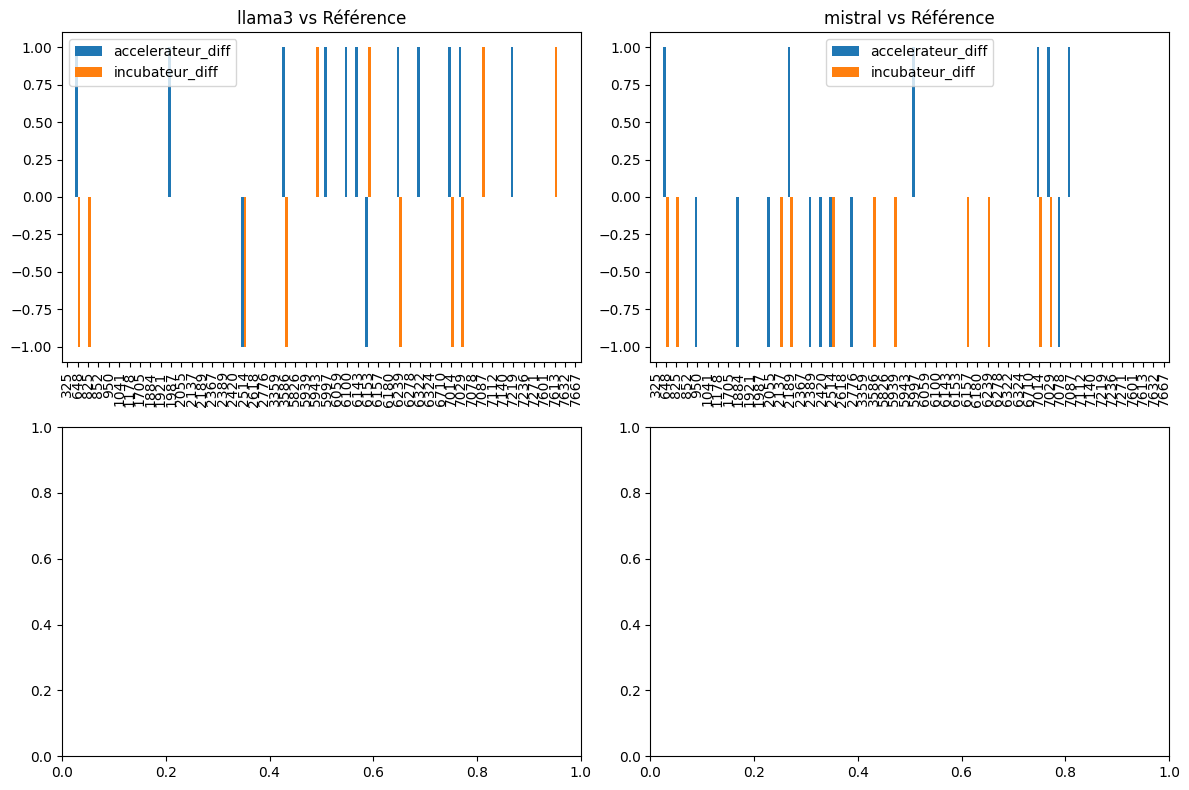

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir en DataFrame
df_llama3 = llama3[['id', 'incubateur', 'accelerateur']]
df_mistral = mistral[['id', 'incubateur', 'accelerateur']]
df_reference = reference[['id', 'incubateur', 'accelerateur']]

# Fusionner les deux premiers DataFrames avec la référence en utilisant l'ID comme clé de fusion
merged_algo1 = pd.merge(df_llama3, df_reference, on='id', suffixes=('_llama3', '_ref'))
merged_algo2 = pd.merge(df_mistral, df_reference, on='id', suffixes=('_mistral', '_ref'))

# Calculer les différences
merged_algo1['accelerateur_diff'] = merged_algo1['accelerateur_llama3'] - merged_algo1['accelerateur_ref']
merged_algo1['incubateur_diff'] = merged_algo1['incubateur_llama3'] - merged_algo1['incubateur_ref']

merged_algo2['accelerateur_diff'] = merged_algo2['accelerateur_mistral'] - merged_algo2['accelerateur_ref']
merged_algo2['incubateur_diff'] = merged_algo2['incubateur_mistral'] - merged_algo2['incubateur_ref']

# Créer un graphique à barres
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

merged_algo1.plot(kind='bar', x='id', y=['accelerateur_diff', 'incubateur_diff'], ax=axes[0, 0], title="llama3 vs Référence")
merged_algo2.plot(kind='bar', x='id', y=['accelerateur_diff', 'incubateur_diff'], ax=axes[0, 1], title="mistral vs Référence")

# Supprimer les étiquettes x sur la première colonne
axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')

plt.tight_layout()
plt.show()


In [128]:
# Calculer le nombre total d'observations
total_obs = len(df_reference)

# Calculer le nombre de valeurs correctes pour chaque algorithme
correct_values_algo1 = ((merged_algo1['accelerateur_diff'] == 0) & (merged_algo1['incubateur_diff'] == 0)).sum()
correct_values_algo2 = ((merged_algo2['accelerateur_diff'] == 0) & (merged_algo2['incubateur_diff'] == 0)).sum()

# Calculer les pourcentages de valeurs correctes pour chaque algorithme
percentage_correct_algo1 = (correct_values_algo1 / total_obs) * 100
percentage_correct_algo2 = (correct_values_algo2 / total_obs) * 100

# Créer un DataFrame récapitulatif
summary_df = pd.DataFrame({
    'Algorithme': ['Llama3', 'mistral'],
    'Pourcentage de valeurs correctes': [percentage_correct_algo1, percentage_correct_algo2]
})

print("Tableau récapitulatif des pourcentages de valeurs correctes:")
print(summary_df)


Tableau récapitulatif des pourcentages de valeurs correctes:
  Algorithme  Pourcentage de valeurs correctes
0     Llama3                              66.0
1    mistral                              60.0
